In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

In [127]:
def mse(y, y_pred):
    return ((y-y_pred.T)**2)/2

def mse_derivada(y, y_pred):
    return np.reshape(y, (y_pred.shape)) - y_pred

def sigmoide(x):
    return 1./(1. + np.exp(-x))

def sigmoide_derivada(x):
    y = sigmoide(x)
    return y*(1-y)

In [219]:
class Rede:
    # Inicialização da rede
    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs
        self.errors = []

    # TODO alterar passagem de y para dummy; log de erros
    def fit(self, X, y):
        m = np.unique(y).size  # qtd. saidas
        n = X.shape[1]  # qtd. entradas
        self.W = np.random.uniform(0, 1, size = (m, n))  # Inicialização da matriz de pesos
        self.B = np.random.uniform(0, 1, size = (m,1))
        y_dummy = np.eye(m)[y]  # cria dummy de y 

        for ep in range(self.epochs):
            erro_saida = []
            for i, x_i in enumerate(X):
                net = np.dot(self.W, np.reshape(x_i, (n,1))) + self.B  # saida da rede
                y_pred = sigmoide(net)  # predito pela função de ativação
                delta = mse_derivada(y_dummy[i], y_pred) * sigmoide_derivada(net)  # sigmoide sempre 0 para classificação de imagens
                erro_saida.append(mse(y_dummy[i], y_pred).T)

                # Atualização dos pesos
                self.W += self.eta * -delta * -x_i
                self.B += self.eta * -delta
                
            self.errors.append(np.mean(erro_saida))
            print(f"Época: {ep+1} | Erro médio: {np.mean(self.errors):.3f}")

    # Predict pela função de ativação sigmoide
    def predict(self, X):
        return sigmoide(np.dot(self.W, X.T) + self.B)
    
    def predict_class(self, X):
        return np.argmax(self.predict(X), axis=0)

    def compare(self, y, y_pred):
        return np.sum(y == y_pred) / y.size

    def plot_errors(self):
        """
        Plots the mean squared error over epochs.

        This method plots the mean squared error over the epochs of the neural network training.

        Parameters:
        None

        Returns:
        None
        """
        plt.plot(range(self.epochs), self.errors, '.-')
        plt.title("Erro médio quadrático")
        plt.xlabel("Época")
        plt.ylabel("Erro")
        plt.show()

In [220]:
from sklearn.preprocessing import MinMaxScaler

train7x7 = np.load("data/train7x7.npy")
test7x7 = np.load("data/test7x7.npy")

(_, train_labels7x7), (_, test_labels7x7) = mnist.load_data()

train_images7x7 = np.array([img.flatten() for img in train7x7])
test_images7x7 = np.array([img.flatten() for img in test7x7])

scaler = MinMaxScaler()
train_images7x7 = scaler.fit_transform(train_images7x7.reshape(train_images7x7.shape[0], -1))
test_images7x7 = scaler.fit_transform(test_images7x7.reshape(test_images7x7.shape[0], -1))

In [221]:
rede3 = Rede(eta=0.03, epochs=20)
rede3.fit(train_images7x7[:15000], train_labels7x7[:15000])

Época: 1 | Erro médio: 0.146
Época: 2 | Erro médio: 0.121
Época: 3 | Erro médio: 0.113
Época: 4 | Erro médio: 0.109
Época: 5 | Erro médio: 0.107
Época: 6 | Erro médio: 0.106
Época: 7 | Erro médio: 0.105
Época: 8 | Erro médio: 0.104
Época: 9 | Erro médio: 0.103
Época: 10 | Erro médio: 0.103
Época: 11 | Erro médio: 0.103
Época: 12 | Erro médio: 0.102
Época: 13 | Erro médio: 0.102
Época: 14 | Erro médio: 0.102
Época: 15 | Erro médio: 0.102
Época: 16 | Erro médio: 0.102
Época: 17 | Erro médio: 0.101
Época: 18 | Erro médio: 0.101
Época: 19 | Erro médio: 0.101
Época: 20 | Erro médio: 0.101


In [222]:
y_pred_class = rede3.predict_class(test_images7x7)
acc = rede3.compare(test_labels7x7, y_pred_class)
print(acc)

0.4266


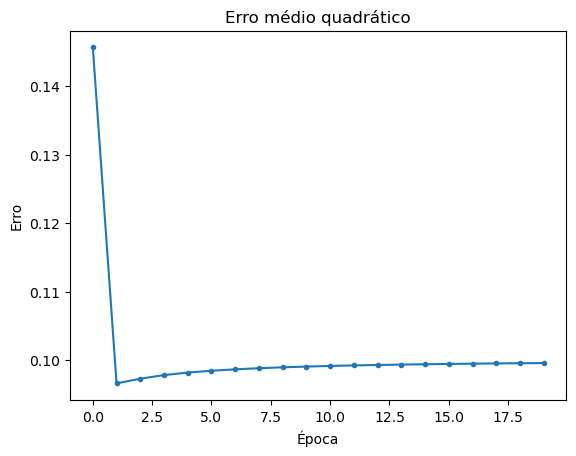

In [223]:
rede3.plot_errors()

---

In [205]:
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = X.rename({4:"classe"}, axis=1)
X["classe"] = X["classe"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
y = X.pop("classe")

In [206]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
rede = Rede(0.02, 100)
rede.fit(X_train, y_train)
pred = rede.predict(X_test)

Época: 1 | Erro médio: 0.285
Época: 2 | Erro médio: 0.273
Época: 3 | Erro médio: 0.269
Época: 4 | Erro médio: 0.267
Época: 5 | Erro médio: 0.265
Época: 6 | Erro médio: 0.264
Época: 7 | Erro médio: 0.264
Época: 8 | Erro médio: 0.263
Época: 9 | Erro médio: 0.263
Época: 10 | Erro médio: 0.262
Época: 11 | Erro médio: 0.262
Época: 12 | Erro médio: 0.262
Época: 13 | Erro médio: 0.262
Época: 14 | Erro médio: 0.261
Época: 15 | Erro médio: 0.261
Época: 16 | Erro médio: 0.261
Época: 17 | Erro médio: 0.261
Época: 18 | Erro médio: 0.260
Época: 19 | Erro médio: 0.258
Época: 20 | Erro médio: 0.254
Época: 21 | Erro médio: 0.250
Época: 22 | Erro médio: 0.246
Época: 23 | Erro médio: 0.243
Época: 24 | Erro médio: 0.239
Época: 25 | Erro médio: 0.236
Época: 26 | Erro médio: 0.234
Época: 27 | Erro médio: 0.231
Época: 28 | Erro médio: 0.229
Época: 29 | Erro médio: 0.226
Época: 30 | Erro médio: 0.224
Época: 31 | Erro médio: 0.222
Época: 32 | Erro médio: 0.220
Época: 33 | Erro médio: 0.219
Época: 34 | Erro mé

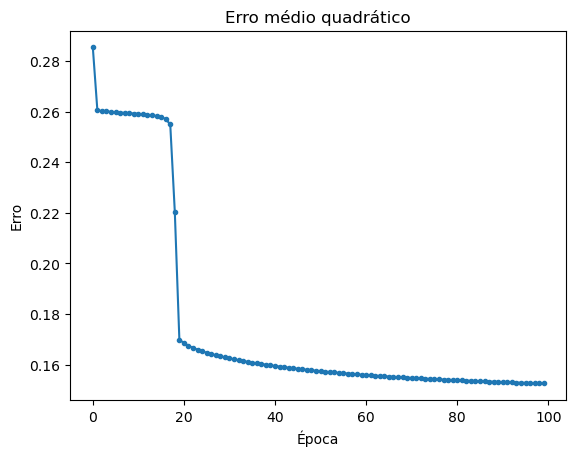

In [209]:
rede.plot_errors()